### Dataset

In this homework, we will use the California Housing Prices from Kaggle.

The goal of this homework is to create a regression model for predicting housing prices (column **median_house_value**).

In [1]:
import os.path

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
path = './housing.csv'
if not os.path.isfile(path):
    !wget $data

In [3]:
!head housing.csv

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


#### Preparing the dataset

- For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2 we are going to use all columns of the dataset.
- First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

##### Preparation

In [4]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv(data)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
# Keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df.ocean_proximity.value_counts()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
df.notna().sum()

longitude             15687
latitude              15687
housing_median_age    15687
total_rooms           15687
total_bedrooms        15530
population            15687
households            15687
median_income         15687
median_house_value    15687
ocean_proximity       15687
dtype: int64

In [9]:
# Fill missing values with zeros
df = df.fillna(0)
df.notna().sum()

longitude             15687
latitude              15687
housing_median_age    15687
total_rooms           15687
total_bedrooms        15687
population            15687
households            15687
median_income         15687
median_house_value    15687
ocean_proximity       15687
dtype: int64

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [11]:
# Apply the log tranform to median_house_value
df.median_house_value = np.log1p(df.median_house_value)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,<1H OCEAN


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Do train/validation/test split with 60%/20%/20% distribution

# Use the train_test_split function and set the random_state parameter to 1.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# reset index
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# split label column (*median_house_value*)
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

# drop label column from features sets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [14]:
from sklearn.feature_extraction import DictVectorizer

In [15]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
dv = DictVectorizer(sparse=True)

# convert df to dicts
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

# convert dicts into matrices
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

#### Question 1

##### Train a model

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

In [17]:
feature_names = dv.get_feature_names_out()
feature_names

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [18]:
dt = DecisionTreeRegressor(max_depth=1)

In [19]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [20]:
y_pred = dt.predict(X_val)
y_pred

array([12.30066927, 12.30066927, 11.60680734, ..., 11.60680734,
       11.60680734, 11.60680734])

In [21]:
from sklearn.tree import export_text

In [22]:
# Which feature is used for splitting the data?
print(export_text(dt, feature_names=feature_names))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [23]:
s = export_text(dt, feature_names=feature_names)
s

'|--- ocean_proximity=<1H OCEAN <= 0.50\n|   |--- value: [11.61]\n|--- ocean_proximity=<1H OCEAN >  0.50\n|   |--- value: [12.30]\n'

In [24]:
splitting_feature = s.strip('|--- ').split(' ')[0].split('=')[0]
splitting_feature

'ocean_proximity'

#### Question 2

Train a random forest model with these parameters:

- `n_estimators=10`
- `random_state=1`
- `n_jobs=-1` (optional - to make training faster)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [27]:
y_pred = rf.predict(X_val)
y_pred

array([12.21720358, 12.11642888, 11.57222122, ..., 11.73604439,
       11.25269032, 11.65289907])

In [28]:
def rmse(y, y_pred):
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [29]:
# RMSE calculation
score = rmse(y_val, y_pred)
print(f'RMSE for Random Forest is %.3f' % score)

RMSE for Random Forest is 0.245


#### Question 3
- Try different values of `n_estimators` parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

In [30]:
scores = []
for n in range (10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, 
                               random_state=1, 
                               n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)
    scores.append((n, score))

In [31]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.244953
1,20,0.238334
2,30,0.236504
3,40,0.235095
4,50,0.234750
5,60,0.234506
6,70,0.234402
7,80,0.234572
8,90,0.234470
9,100,0.234284


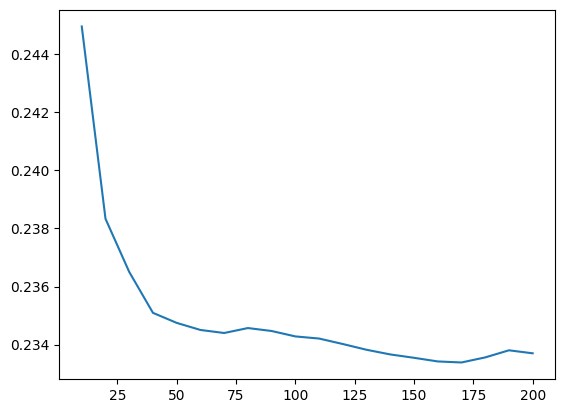

In [32]:
plt.plot(df_scores.n_estimators, df_scores.rmse);

#### Question 4
- Try different values of `max_depth`: [10, 15, 20, 25]
- For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
- Fix the random seed: `random_state`=1

In [33]:
# iterate with many different values of estimators and depthness
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)

        score = rmse(y_val, y_pred)
        scores.append((d, n, score))

KeyboardInterrupt: 

In [ ]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)
plt.legend();

In [ ]:
df_scores[df_scores.rmse == df_scores.rmse.min()]

#### Question 5

Extract feature importance information from tree-based models

Train the model with these parameters:
- `n_estimators=10`
- `max_depth=20`
- `random_state=1`
- `n_jobs=-1` (optional)

What's the most important feature (among these 4)?
- `total_rooms`
- `median_income`
- `total_bedrooms`
- `longitude`

##### Train the model

In [34]:
rf = RandomForestRegressor(n_estimators=10,
                           max_depth=20,
                           random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [35]:
# feature importance after training the model
rf.feature_importances_

array([0.01495348, 0.03019435, 0.10189142, 0.0861758 , 0.33566849,
       0.29247297, 0.07380644, 0.02682069, 0.01624481, 0.02177155])

##### Get the most  important feature

In [36]:
# create a list of tuples and sort it by feature importance value 
fi_list = list(zip(feature_names, rf.feature_importances_))
fi_list.sort(key=lambda x: x[1], reverse=True)
fi_list

[('median_income', 0.33566849340251753),
 ('ocean_proximity=<1H OCEAN', 0.29247296545343116),
 ('latitude', 0.10189141894557846),
 ('longitude', 0.08617580381806568),
 ('ocean_proximity=INLAND', 0.07380644294557998),
 ('housing_median_age', 0.030194348002947978),
 ('population', 0.026820690830484637),
 ('total_rooms', 0.021771553653737723),
 ('total_bedrooms', 0.01624480660362488),
 ('households', 0.014953476344031812)]

In [37]:
import itertools

In [38]:
# pick and print the most important feature among 'total_rooms', 'median_income', 'total_bedrooms' and 'longitude'
features = ['total_rooms', 'median_income', 'total_bedrooms', 'longitude']
for fi, f in itertools.product(fi_list, features):
    name = fi[0]
    if name == f:
        value = fi[1]
        break
print(f'The most important feature is %s, with a score of %.3f' % (name, value))

The most important feature is median_income, with a score of 0.336


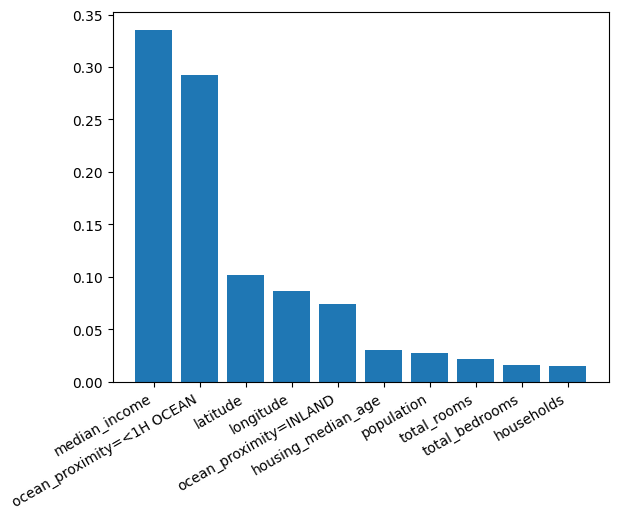

In [39]:
# graphic view of features importance
features = [x[0] for x in fi_list]
values = [x[1] for x in fi_list]

fig, ax = plt.subplots()
ax.bar(features, values)
plt.xticks(rotation=30, ha='right')
plt.show();

#### Question 6

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds

In [40]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [41]:
import xgboost as xgb

In [42]:
# replace special characters from feature names to avoid further errors
feature_names = [f.replace("=<", "_").replace("=", "_").replace(" ", "_") for f in feature_names]
feature_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_1H_OCEAN',
 'ocean_proximity_INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [43]:
# generate the dmatrix for both sets
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names) 
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names) 

In [44]:
eta = [0.1, 0.3]
for num, name in enumerate(eta, start=1):
    print("Eta {}: {}".format(num, name))

Eta 1: 0.1
Eta 2: 0.3


In [45]:
# monitor each iteration to see how the model is performing
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [46]:
values = ["a", "b", "c"]
for count, value in enumerate(values, start=1):
    print(count, value)

1 a
2 b
3 c


In [58]:
%%capture output

etas = [0.1, 0.3]

for eta in etas:
    print(f"Eta {eta}")

    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, 
                      num_boost_round=100, 
                      verbose_eval=5,
                      evals=watchlist)

In [187]:
scores_rmse = output.stdout
print(scores_rmse[:])

Eta 0.1
[0]	train-rmse:10.37456	val-rmse:10.37545
[5]	train-rmse:6.13433	val-rmse:6.13236
[10]	train-rmse:3.63299	val-rmse:3.62939
[15]	train-rmse:2.15901	val-rmse:2.15616
[20]	train-rmse:1.29412	val-rmse:1.29329
[25]	train-rmse:0.78993	val-rmse:0.79341
[30]	train-rmse:0.50217	val-rmse:0.51148
[35]	train-rmse:0.34590	val-rmse:0.36370
[40]	train-rmse:0.26743	val-rmse:0.29345
[45]	train-rmse:0.23015	val-rmse:0.26316
[50]	train-rmse:0.21121	val-rmse:0.24925
[55]	train-rmse:0.20246	val-rmse:0.24352
[60]	train-rmse:0.19692	val-rmse:0.24081
[65]	train-rmse:0.19120	val-rmse:0.23867
[70]	train-rmse:0.18715	val-rmse:0.23708
[75]	train-rmse:0.18364	val-rmse:0.23546
[80]	train-rmse:0.17941	val-rmse:0.23424
[85]	train-rmse:0.17620	val-rmse:0.23306
[90]	train-rmse:0.17320	val-rmse:0.23231
[95]	train-rmse:0.17056	val-rmse:0.23128
[99]	train-rmse:0.16845	val-rmse:0.23052
Eta 0.3
[0]	train-rmse:8.07362	val-rmse:8.07348
[5]	train-rmse:1.38983	val-rmse:1.38852
[10]	train-rmse:0.33195	val-rmse:0.34802
[1

']'

In [185]:
def parse_xgb_output(output):
    results = [[]]
    heads = []
    first = True

    for line in scores_rmse.strip().split('\n'):
        a = line.split('\t')
        if len(a) > 1:
            it_line = a[0]
            train_line = a[1] 
            val_line = a[2]

            it = int(it_line.strip('[]'))
            train = float(train_line.split(':')[1])
            val = float(val_line.split(':')[1])

            results.append((it, train, val))
        elif first == True:            
            heads.append(a)
            

    #columns = ['num_iter', 'train_auc', 'val_auc']
    #df_results = pd.DataFrame(results, columns=columns)

    #df_results
    #heads, 
    return results
parse_xgb_output(output)

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 1


IndexError: list index out of range

list

In [152]:
a = [[
    [1, 2], 
    [3, 4]], 
    [[10, 20], 
    [30, 40]
]]
b=[]
b.append([100, 200])
b.append([300, 400])
b
a.append(b)
a
#a[2][1]
#a[1].append('2')
#a[0].append('1')


[[[1, 2], [3, 4]], [[10, 20], [30, 40]], [[100, 200], [300, 400]]]

In [86]:
a = scores_rmse.strip('Eta 0.1')
#b = str(a).split('Eta 2: 0.3')
a

'\n[0]\ttrain-rmse:10.37456\tval-rmse:10.37545\n[5]\ttrain-rmse:6.13433\tval-rmse:6.13236\n[10]\ttrain-rmse:3.63299\tval-rmse:3.62939\n[15]\ttrain-rmse:2.15901\tval-rmse:2.15616\n[20]\ttrain-rmse:1.29412\tval-rmse:1.29329\n[25]\ttrain-rmse:0.78993\tval-rmse:0.79341\n[30]\ttrain-rmse:0.50217\tval-rmse:0.51148\n[35]\ttrain-rmse:0.34590\tval-rmse:0.36370\n[40]\ttrain-rmse:0.26743\tval-rmse:0.29345\n[45]\ttrain-rmse:0.23015\tval-rmse:0.26316\n[50]\ttrain-rmse:0.21121\tval-rmse:0.24925\n[55]\ttrain-rmse:0.20246\tval-rmse:0.24352\n[60]\ttrain-rmse:0.19692\tval-rmse:0.24081\n[65]\ttrain-rmse:0.19120\tval-rmse:0.23867\n[70]\ttrain-rmse:0.18715\tval-rmse:0.23708\n[75]\ttrain-rmse:0.18364\tval-rmse:0.23546\n[80]\ttrain-rmse:0.17941\tval-rmse:0.23424\n[85]\ttrain-rmse:0.17620\tval-rmse:0.23306\n[90]\ttrain-rmse:0.17320\tval-rmse:0.23231\n[95]\ttrain-rmse:0.17056\tval-rmse:0.23128\n[99]\ttrain-rmse:0.16845\tval-rmse:0.23052\nEta 0.3\n[0]\ttrain-rmse:8.07362\tval-rmse:8.07348\n[5]\ttrain-rmse:1.389

In [74]:
import re

In [79]:
def str_to_dict(string, key_common):
 
    return [item for item in string if item.startswith(key_common)]
 
 #   return {key[1:-2]: int(value) for key, value in (pair.split(': ') for pair in pairs)}
    

str_to_dict(scores_rmse, "Eta")



[]